# Inferential Statistics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import uniform, norm, gamma, expon, poisson, binom, bernoulli

## Probability Distribution

Distribusi?

* Dadu ada 6 sisi: 1, 2, 3, 4, 5, 6
* prob angka 1: 1/6
* prob angka 3: 1/6
* prob angka 5: 1/6
* distribusi: 1/6 (1), 1/6 (2), 1/6 (3), ..., 1/6 (6)

### Uniform Distribution

Ciri:
* probabilitas selalu sama
    * pelemparan dadu
    * pelemparan koin
    * etc.
* perlu **batas bawah (a) dan batas akhir (b)**
    * pelemparan dadu: a=1, b=6 (1/6, 1/6, ..., 1/6)
    * pelemparan koin: a=1, b=2 (1/2, 1/2)

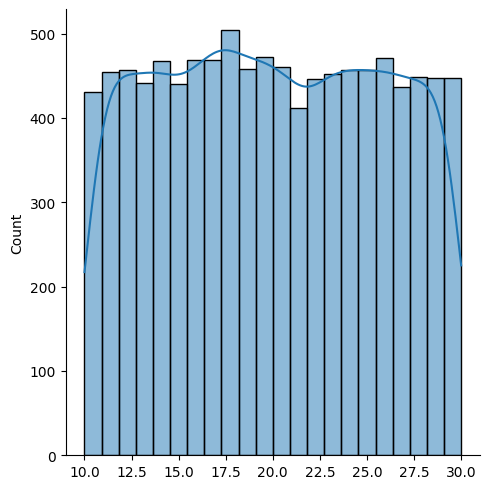

In [2]:
# scipy
n_sample = 10000
start = 10
width = 20
data_uniform = uniform.rvs(
    size=n_sample,
    loc=start,
    scale=width
)

sns.displot(
    data=data_uniform,
    kde=True
)
plt.show()

In [3]:
data_uniform

array([14.73691146, 22.51049417, 27.65947489, ..., 23.02424953,
       16.90891271, 20.27531116])

In [4]:
# numpy
rng = np.random.default_rng(1)

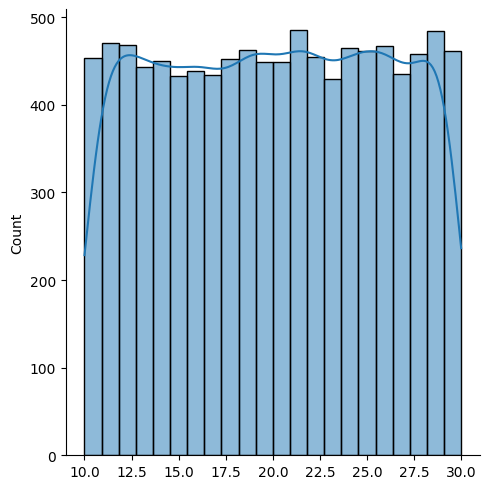

In [5]:
np_data_uniform = rng.uniform(low=start, high=start+width, size=n_sample)

sns.displot(
    data=np_data_uniform,
    kde=True
)
plt.show()

In [6]:
np_data_uniform

array([20.23643249, 29.00927393, 12.88319225, ..., 12.33037707,
       16.39617963, 19.6290739 ])

In [7]:
# probability
1 / ((start+width) - start)

0.05

In [8]:
uniform.pdf(10, loc=start, scale=width)

0.05

In [9]:
uniform.pdf(11, loc=start, scale=width)

0.05

In [10]:
# pelemparan dadu
print(uniform.pdf(2, loc=0, scale=6))
print(uniform.pdf(6, loc=0, scale=6))
print(1/6)

0.16666666666666666
0.16666666666666666
0.16666666666666666


### Normal Distribution

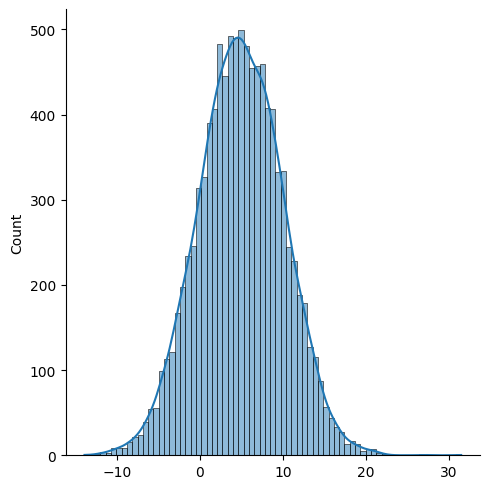

In [11]:
mean = 5
std = 5
normal_dist = norm.rvs(size=n_sample, loc=mean, scale=std)

sns.displot(
    data=normal_dist,
    kde=True
)
plt.show()

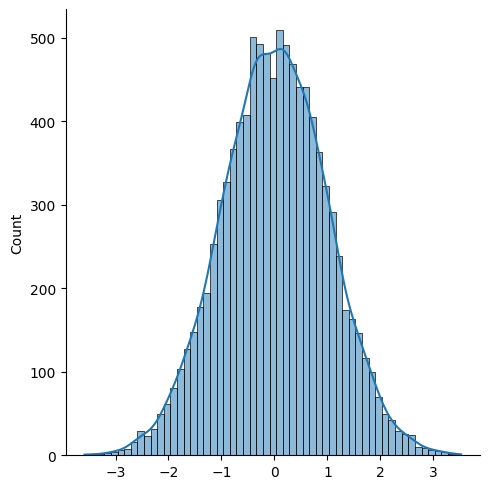

In [12]:
mean = 0
std = 1
normal_dist = norm.rvs(size=n_sample, loc=mean, scale=std)

sns.displot(
    data=normal_dist,
    kde=True
)
plt.show()

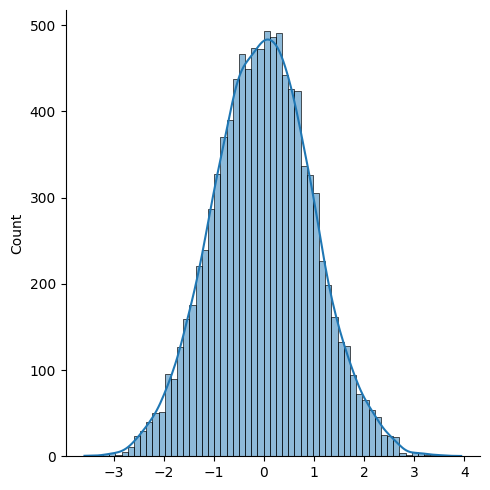

In [13]:
np_normal_dist = rng.normal(loc=mean, scale=std, size=n_sample)

sns.displot(data=np_normal_dist, kde=True)
plt.show()

### Gamma Distribution

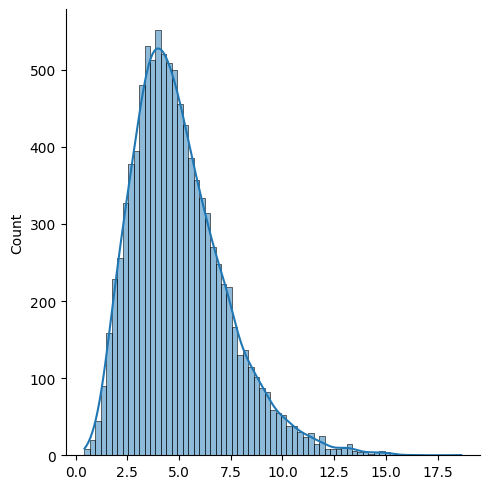

In [14]:
# scipy
gamma_dist = gamma.rvs(a=5, size=n_sample)

sns.displot(data=gamma_dist, kde=True)
plt.show()

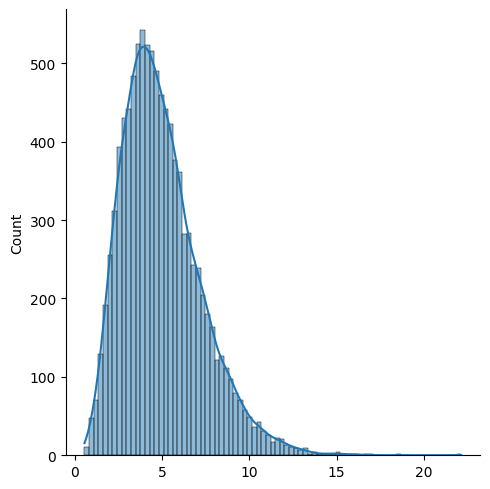

In [15]:
np_gamma_dist = rng.gamma(shape=5, size=n_sample)

sns.displot(data=np_gamma_dist, kde=True)
plt.show()

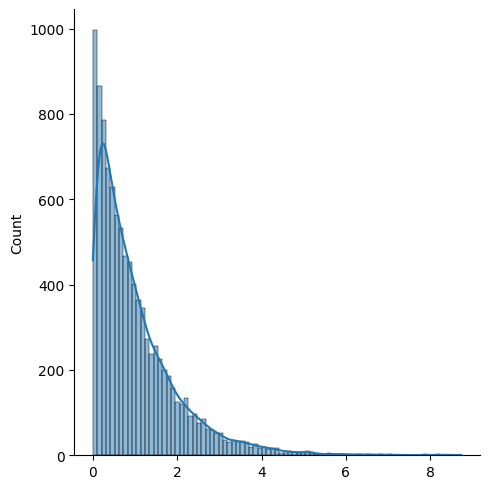

In [16]:
np_gamma_dist = rng.gamma(shape=1, size=n_sample)

sns.displot(data=np_gamma_dist, kde=True)
plt.show()

### Exponential Distribution

Poisson process?
* jumlah hewan yang diadopsi di penangkaran hewan setiap minggu
* jumlah pelanggan yang datang di sebuah restoran setiap jam

Eksponensial:
* berapa minggu yang dibutuhkan untuk penangkaran hewan mengadopsi 5 hewan?
* berapa jam yang dibutuhkan untuk sebuah restoran mendapat jumlah pelanggan sama dengan 10 orang?

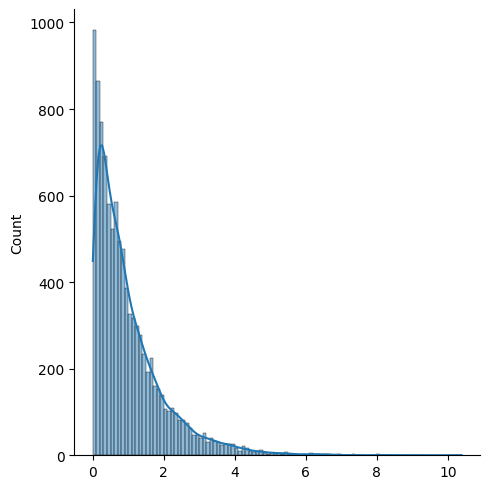

In [17]:
expon_dist = expon.rvs(loc=0, scale=1, size=n_sample)
sns.displot(data=expon_dist, kde=True)
plt.show()

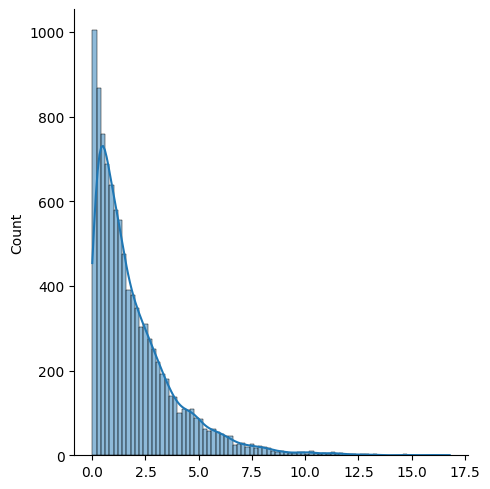

In [18]:
expon_dist = expon.rvs(loc=0, scale=2, size=n_sample)
sns.displot(data=expon_dist, kde=True)
plt.show()

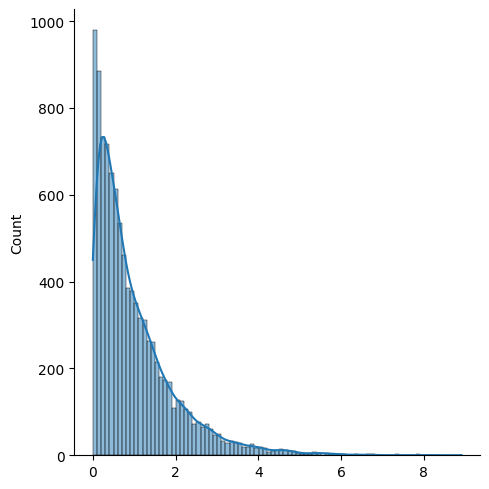

In [19]:
np_expon_dist = rng.exponential(scale=1, size=n_sample)
sns.displot(data=np_expon_dist, kde=True)
plt.show()

### Poisson Distribution

Poisson process?
* jumlah hewan yang diadopsi di penangkaran hewan setiap minggu
* jumlah pelanggan yang datang di sebuah restoran setiap jam

Poisson dist:
* berapa probabilitas ada 7 hewan yang di adopsi setiap minggu?
* berapa probabilitas 100 pelanggan datang ke restoran setiap jam?

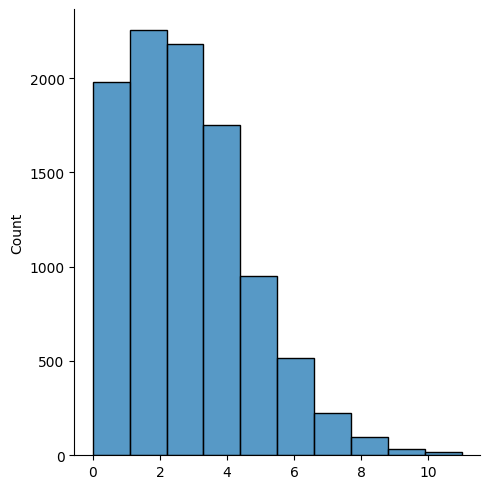

In [20]:
# scipy
poisson_dist = poisson.rvs(mu=3, size=n_sample)
sns.displot(poisson_dist, bins=10, kde=False)
plt.show()

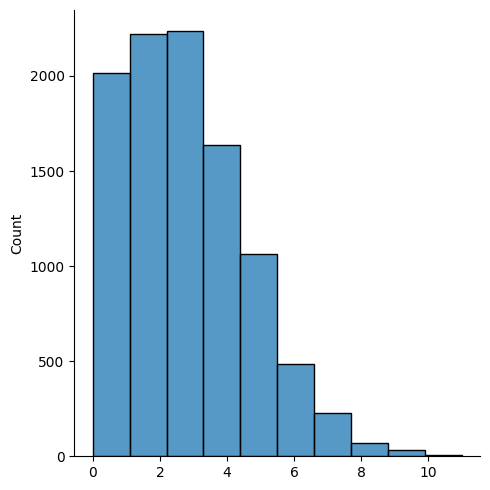

In [21]:
# numpy
np_poisson_dist = rng.poisson(lam=3, size=n_sample)
sns.displot(np_poisson_dist, bins=10)
plt.show()

### Bernoulli Distribution

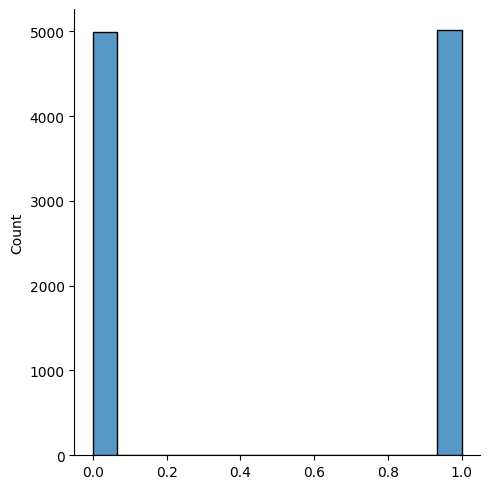

In [22]:
# pelemparan koin (head / tail)
# true => head
prob_true = .5
bernoulli_dist = bernoulli.rvs(p=prob_true, size=n_sample)

sns.displot(bernoulli_dist)
plt.show()

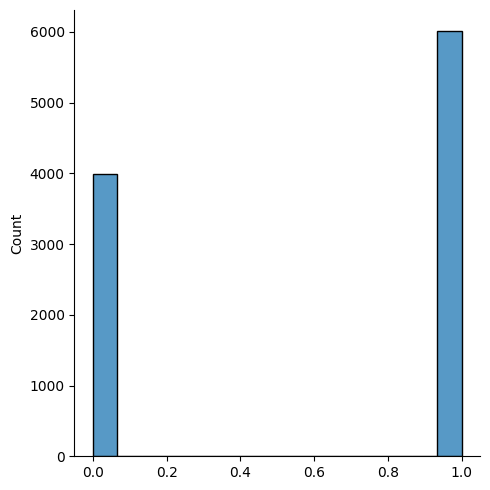

In [23]:
prob_true = .6
bernoulli_dist = bernoulli.rvs(p=prob_true, size=n_sample)

sns.displot(bernoulli_dist)
plt.show()

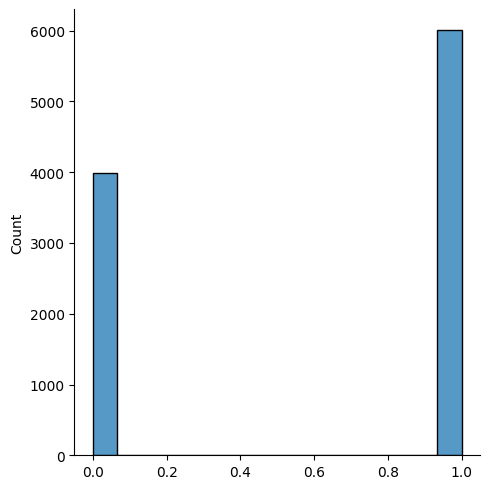

In [24]:
np_bernoulli_dist = rng.binomial(n=1, p=prob_true, size=n_sample)

sns.displot(np_bernoulli_dist)
plt.show()

### Binomial Distribution

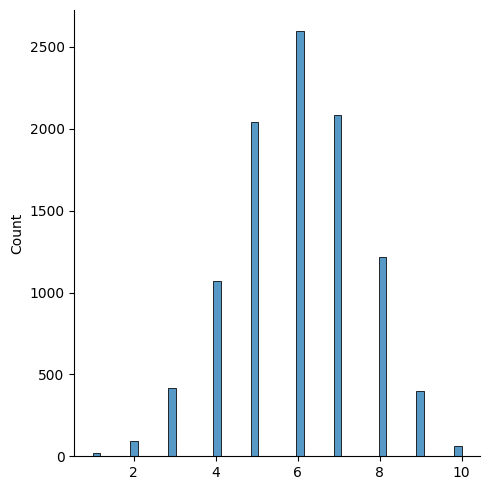

In [25]:
num_trials = 10
prob_true = .6
binom_dist = binom.rvs(n=num_trials, p=prob_true, size=n_sample)

sns.displot(binom_dist)
plt.show()

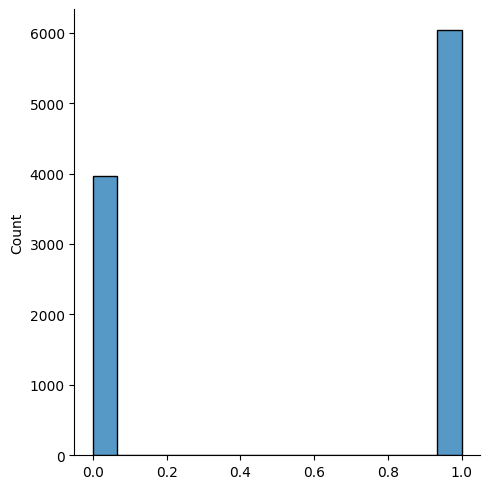

In [26]:
# bernoulli n=1
num_trials = 1
prob_true = .6
binom_dist = binom.rvs(n=num_trials, p=prob_true, size=n_sample)

sns.displot(binom_dist)
plt.show()

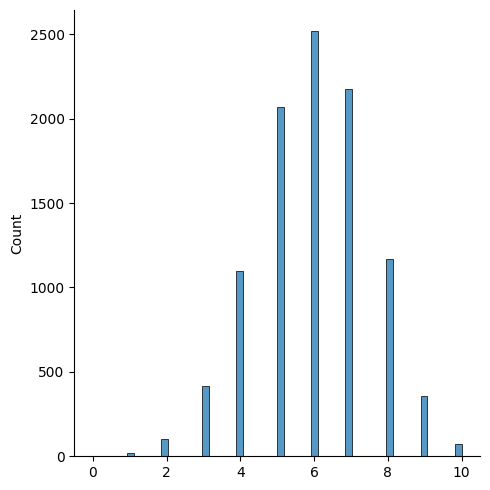

In [27]:
# numpy
num_trials = 10
prob_true = .6
np_binom_dist = rng.binomial(n=num_trials, p=prob_true, size=n_sample)

sns.displot(np_binom_dist)
plt.show()

## Condidence Intervals

In [28]:
df_heart = pd.read_csv("data/heart.csv")
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [29]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [30]:
df_heart["gender"] = df_heart.sex.replace({1: "male", 0: "female"})
df_sample = df_heart.sample(frac=.5, random_state=11)

data = df_heart[["target", "gender"]]
sample_data = df_sample[["target", "gender"]]
print("Sample size:", sample_data.shape[0])

sample_data

Sample size: 512


,target,gender
894,0,male
989,1,female
819,0,female
513,0,male
763,1,female
...,...,...
576,1,male
588,0,female
500,1,female
587,0,male


### Proportion

> can you infer the proportion of female with heart disease?

In [31]:
sample_crosstab = pd.crosstab(sample_data["target"], sample_data["gender"])
sample_crosstab

gender,female,male
target,,
0,52,207
1,110,143


In [32]:
n_female = sample_crosstab["female"].sum()
n_female_heart = sample_crosstab.loc[1, "female"]
p_hat = n_female_heart / n_female

print("Sample proportion:", p_hat)

Sample proportion: 0.6790123456790124


In [33]:
std_err = np.sqrt(p_hat * (1 - p_hat) / n_female)
print("Standard error:", std_err)

Standard error: 0.036679676151223424


In [34]:
z_score = 1.96    # 95% confidence interval
ci_bottom = p_hat - z_score*std_err
ci_top = p_hat + z_score*std_err

print(f"CI: [{ci_bottom}, {ci_top}]")

CI: [0.6071201804226145, 0.7509045109354102]


In [35]:
crosstab = pd.crosstab(data["target"], data["gender"])
p = crosstab.loc[1, "female"] / crosstab["female"].sum()

print("Population proportion:", p)

Population proportion: 0.7243589743589743


> **Conclussion**
>
> We're **95%** confident that **60.7% to 75.1% female has heart disease**

### Mean

> can you infer the cholesterol rate of female?

In [36]:
chol_data = df_heart[["gender", "chol"]]
sample_chol_data = df_sample[["gender", "chol"]]

In [37]:
sample_chol_per_gender = sample_chol_data.groupby("gender").agg([np.mean, np.std, np.size])
sample_chol_per_gender

chol                
              mean        std size
gender                            
female  270.074074  70.544163  162
male    240.491429  45.214467  350

In [38]:
n_sample = sample_chol_per_gender["chol"].loc["female", "size"]
mean_hat = sample_chol_per_gender["chol"].loc["female", "mean"]
std_err = sample_chol_per_gender["chol"].loc["female", "std"] / np.sqrt(n_sample)

print("Sample mean:", mean_hat)
print("Standard error:", std_err)

Sample mean: 270.0740740740741
Standard error: 5.542472902087534


In [39]:
z_score = 1.96    # 95% confidence rate
ci_bottom = mean_hat - z_score*std_err
ci_top = mean_hat + z_score*std_err

print(f"CI: [{ci_bottom}, {ci_top}]")

CI: [259.2108271859825, 280.93732096216564]


In [40]:
chol_per_gender = chol_data.groupby("gender").agg([np.mean, np.std, np.size])
chol_per_gender["chol"].loc["female", "mean"]

261.45512820512823

> **Conclussion:**
>
> We're **95%** confident that cholesterol rate of women, **in average, is between 259.2 and 280.9**

## Hypothesis Testing

In [41]:
n = 1018
p_null = .52
p_hat = .56    # test the hypothesis

In [42]:
num_proportion = .56 * 1018
z_test, p_value = sm.stats.proportions_ztest(num_proportion, n, p_null, alternative="larger")

print("Z-test:", z_test)
print("p-value:", p_value)

Z-test: 2.571067795759113
p-value: 0.005069273865860533


In [43]:
alpha = .05
print(p_value < alpha)

True


Conclussion: **Reject null hypothesis**